# Task-1
## Prediction Using Decision Tree Algorithm

### Author : Tanaya Modak 

### Problem Statement : Create the Decision Tree classifier and visualize it graphically.

## Import The Required Libraries and Data

In [1]:
#First, We will import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

sns.set_style('whitegrid')

In [2]:
#Load the data

df = pd.read_csv('iris.csv')  #To download this Dataset : https://bit.ly/3kXTdox
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Inspect the data

In [3]:
df.shape

(150, 6)

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Visualize the Data

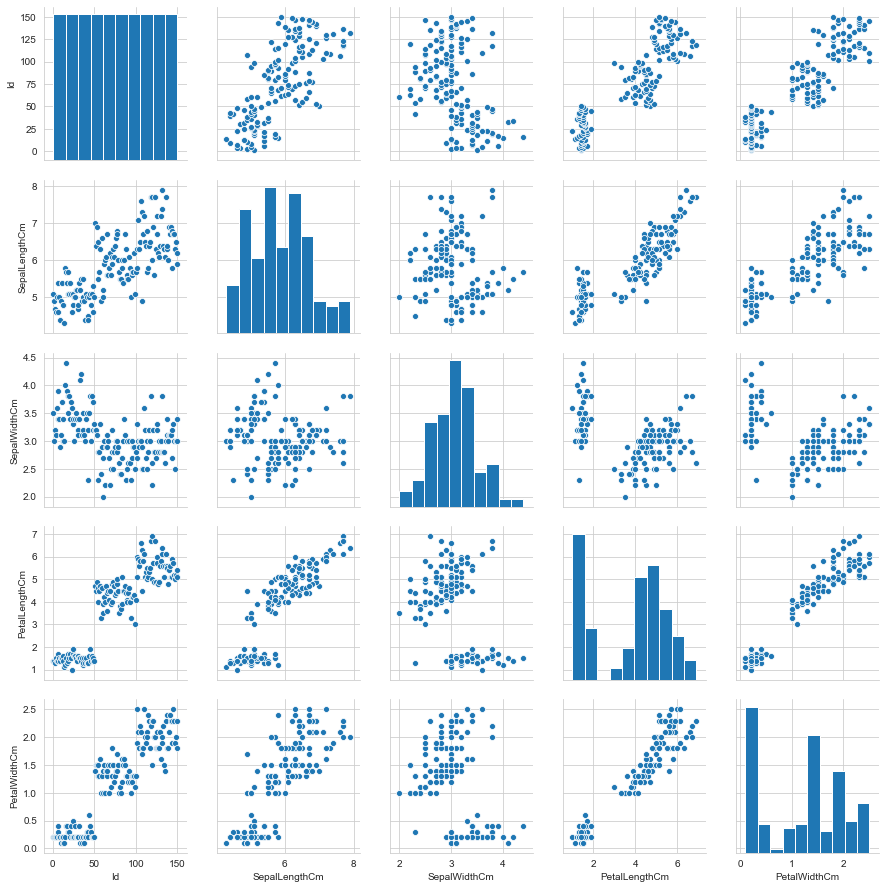

In [6]:
sns.pairplot(df)
plt.show()

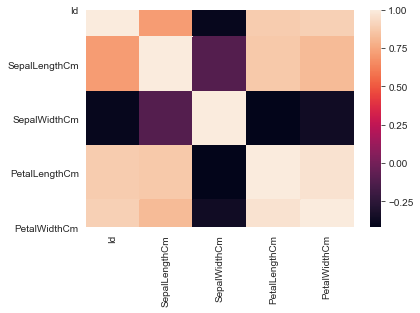

In [7]:
corr = df.corr()
sns.heatmap(corr)
plt.show()

## Getting data for trining

In [8]:
label_encoder = LabelEncoder() 

X = df.iloc[:, 1:5].values
y = label_encoder.fit_transform(df['Species'].values)

## Train the Model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  #Without Hyperparameter Tuning

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
predict = model.predict(X_test)

## Predicting values for new data

In [12]:
model.predict([[5.6, 3.2, 1.6, 0.5]])

array([0])

## Model Evaluation

In [13]:
print("Confusion Matrix: ", confusion_matrix(y_test, predict))
print("Accuracy Score: ", accuracy_score(y_test, predict))

Confusion Matrix:  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score:  1.0


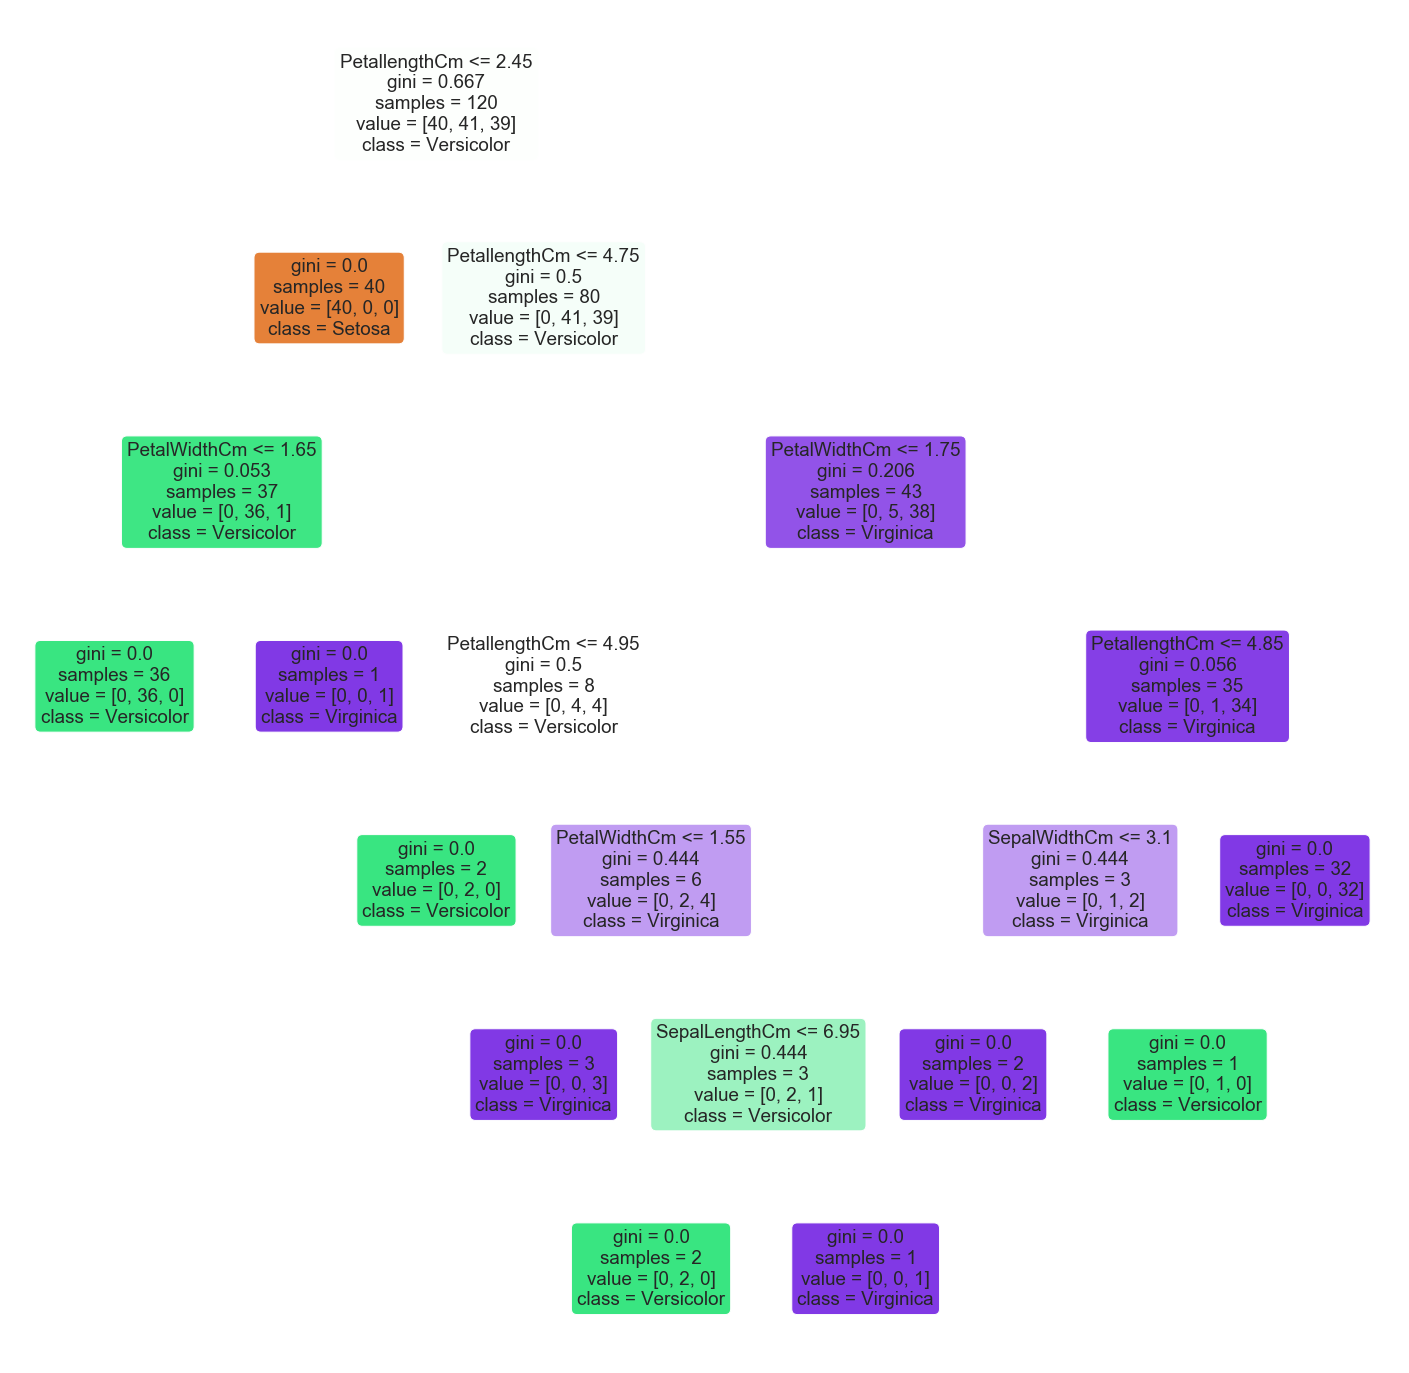

In [14]:
features = ["SepalLengthCm", "SepalWidthCm", "PetallengthCm", "PetalWidthCm"]
species = ["Setosa", "Versicolor", "Virginica"]

fig = plt.figure(figsize=(25, 25))
_ = tree.plot_tree(model, 
                   feature_names=features, 
                   class_names=species, 
                   filled = True,
                   rounded=True)
fig.savefig("img.png")

In [15]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: 2



In [16]:
with open("decision_tree.log","w") as fout:
    fout.write(text_representation)